In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2/output'



In [3]:
!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    print(f"Seed: {i}")
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --seed {i}
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 70 --seed {i}
    !python -m experiments.color_mnist.train_longtailed --rotations 3 --planes 17 --separable --seed {i}

model performances:
	Z2CNN: 0.668+/-0.006
	CECNN: 0.852+/-0.012


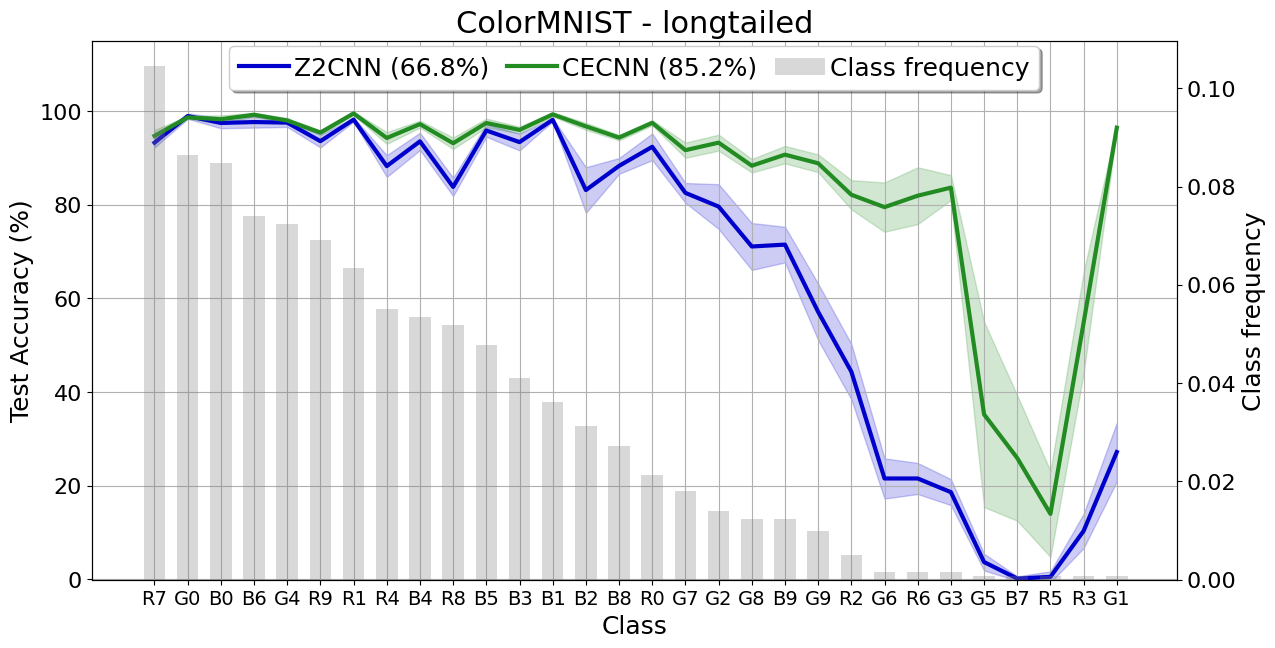

In [7]:
from utils import plot_figure_2
plot_figure_2("/home/arco/Downloads/Master AI/CEConvDL2")

model performances:
		 ResNet-18: 0.147
		 ResNet-18 + jitter: 0.719
		 CE-ResNet-18 [Novel]: 0.342
		 CE-ResNet-18 + jitter [Novel]: 0.756


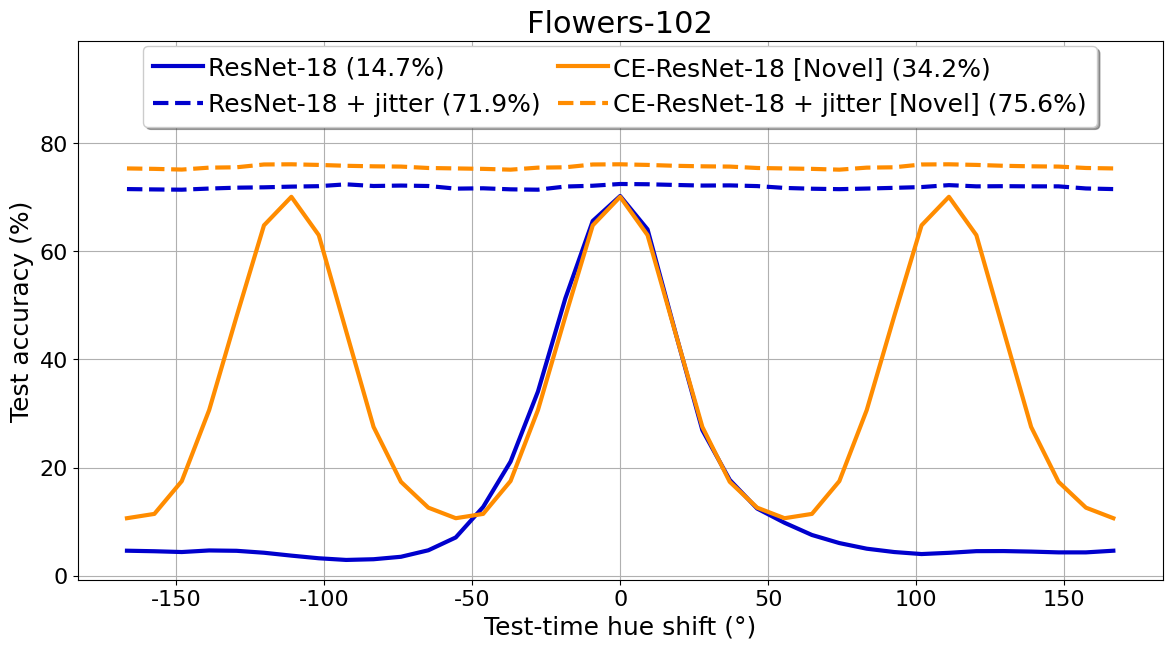

In [5]:
from utils import plot_figure_9
plot_figure_9("/home/arco/Downloads/Master AI/CEConvDL2")

/home/arco/Downloads/Master AI/CEConvDL2/CEConv/utils.py:457: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  f.legend([y_flower, y_stl], labels=label_names,


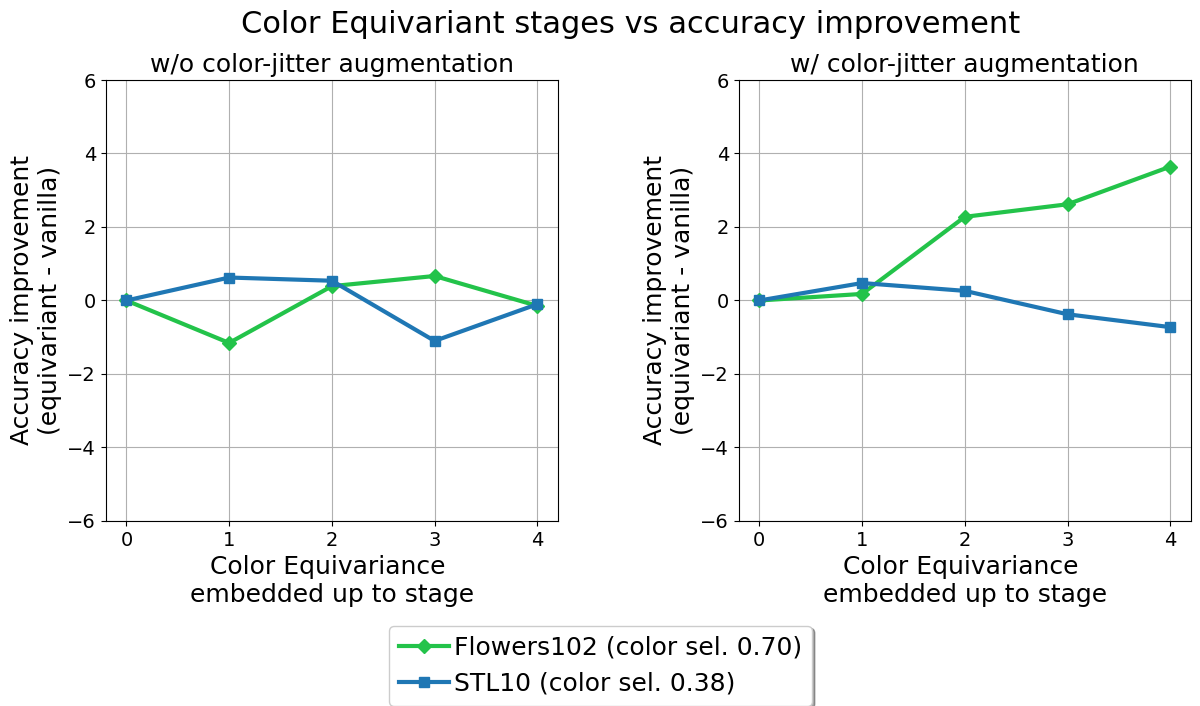

In [26]:
from utils import color_selective_datasets_plot
color_selective_datasets_plot()

Max accuracy 1 rot:  0.7025532722473145
Max accuracy 5 rot:  0.7243454456329346
Max accuracy 10 rot:  0.746300220489502


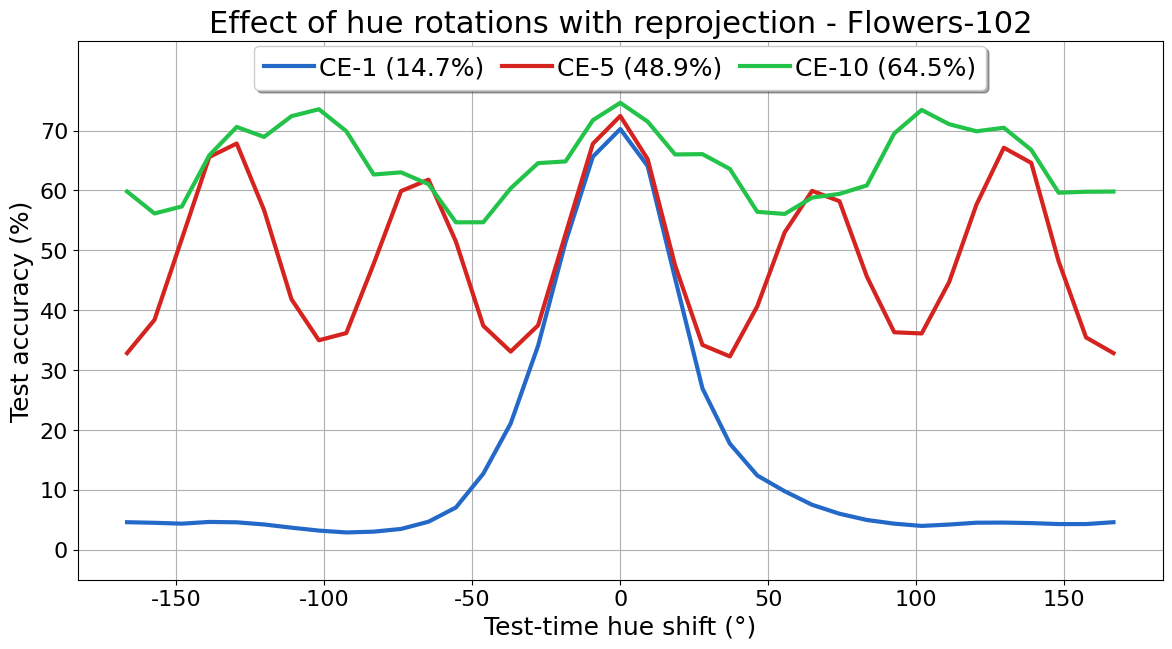

In [3]:
from utils import hue_shifts_plot
hue_shifts_plot()

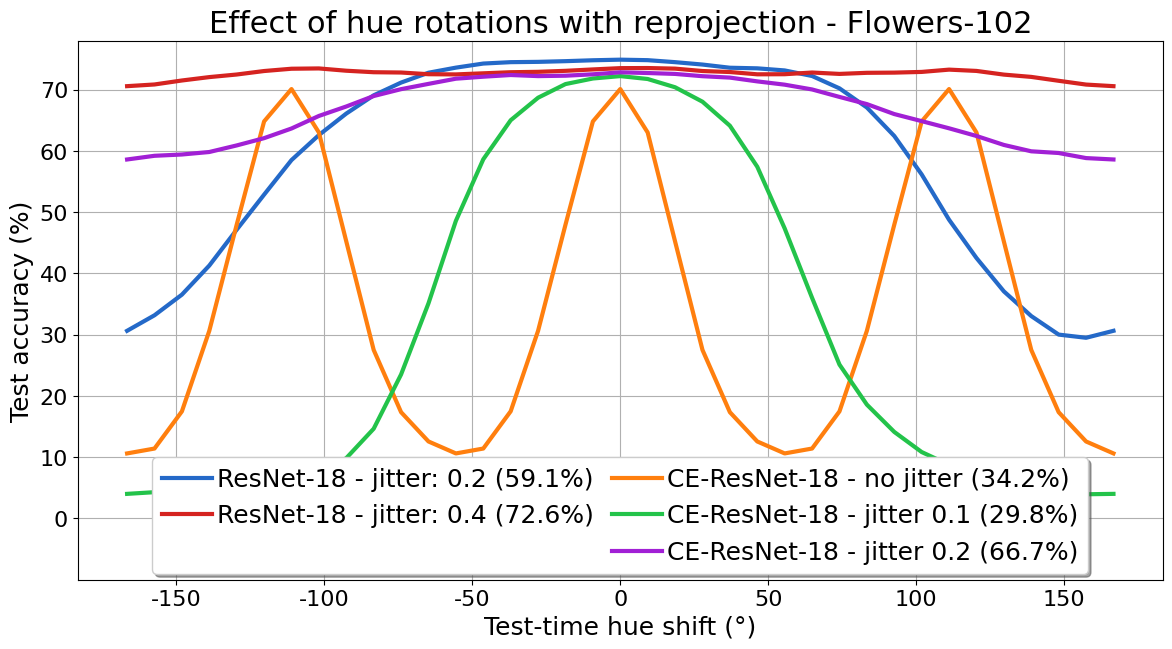

In [16]:
from utils import jitter_plot
jitter_plot()

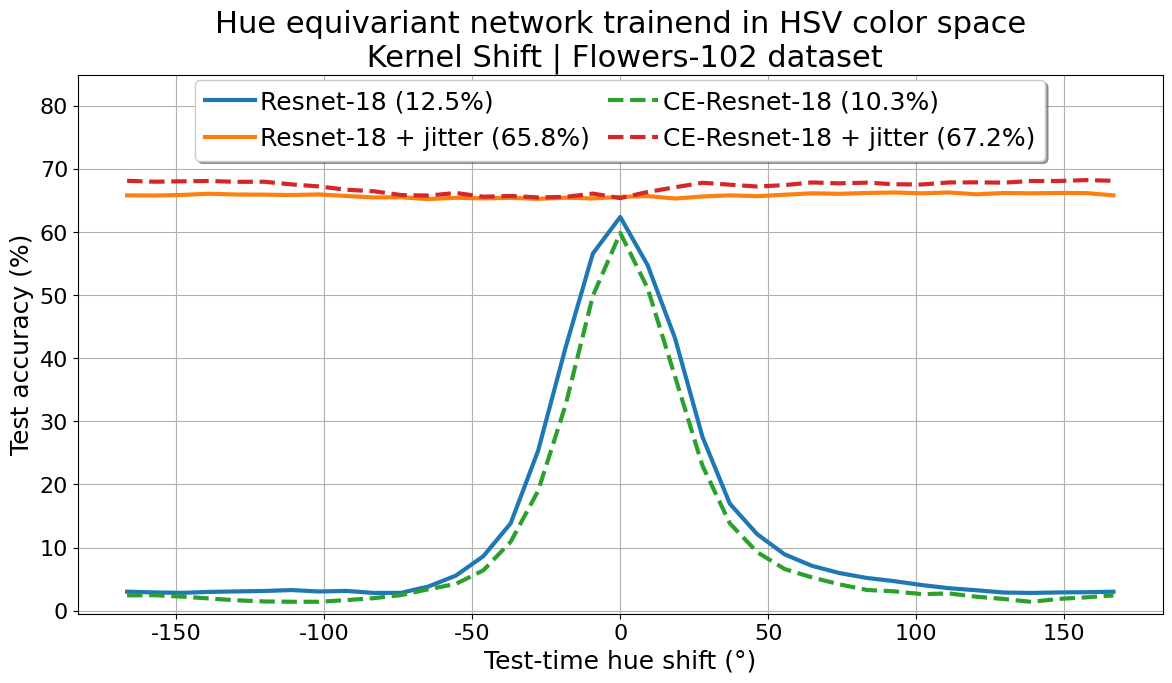

In [17]:
from utils import hue_kernel
hue_kernel()

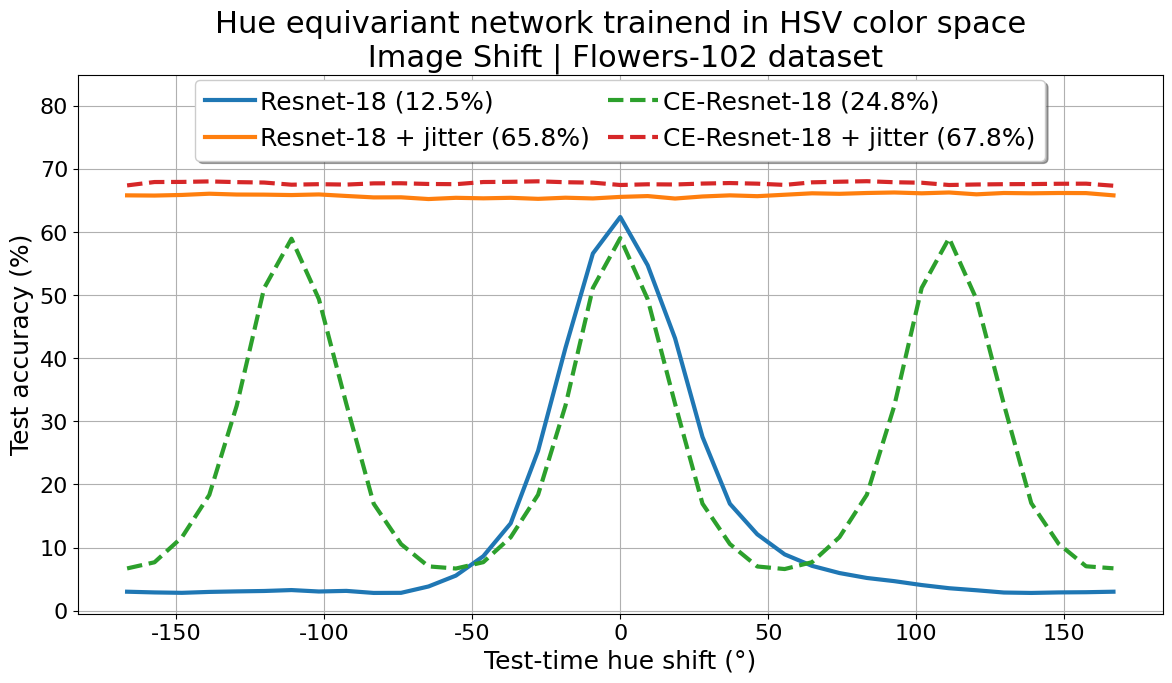

In [23]:
from utils import hue_image
hue_image()

model performances:
	Z2CNN-20: 0.668+/-0.006
	Z2CNN-70: 0.700+/-0.003
	CECNN: 0.852+/-0.012


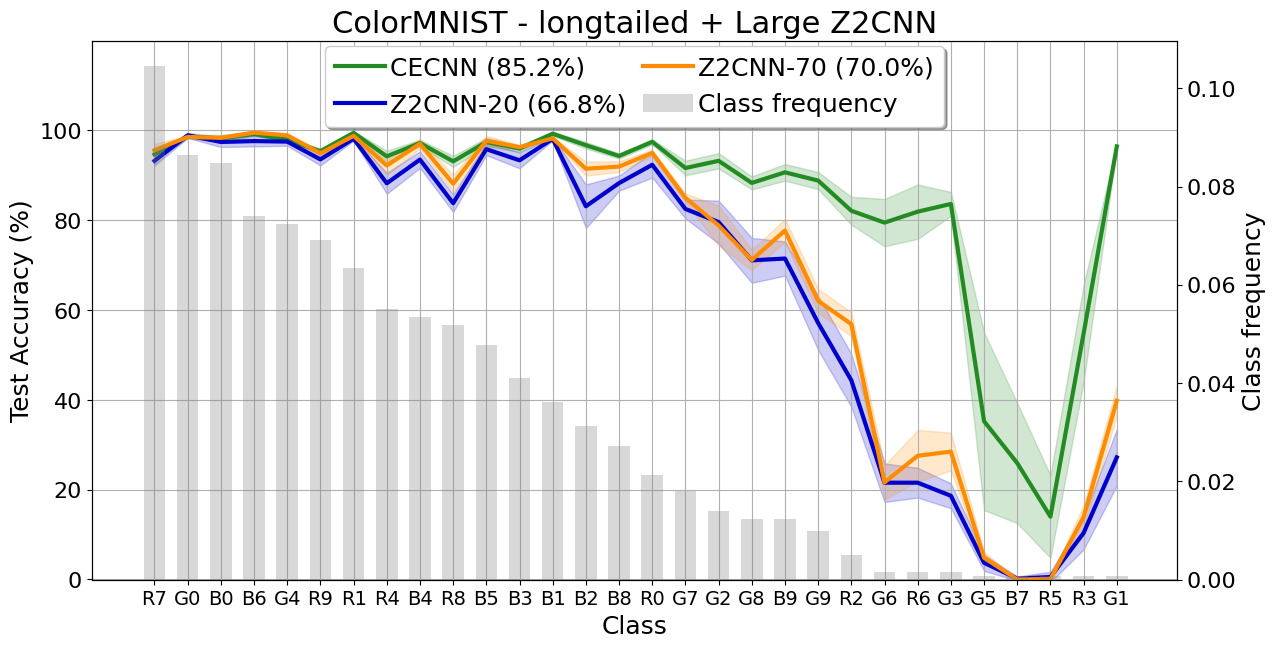

In [11]:
from utils import plot_figure_22
plot_figure_22("/home/arco/Downloads/Master AI/CEConvDL2")

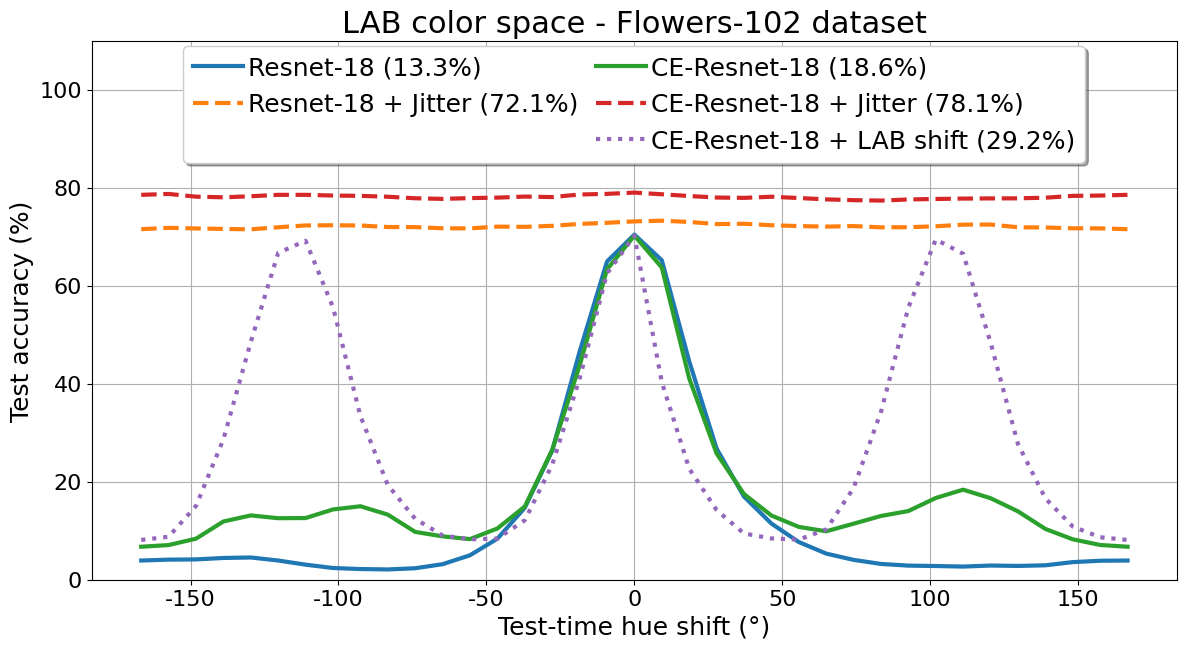

In [18]:
from utils import lab
lab()

[-1.         -0.95833331 -0.91666669 -0.875      -0.83333331 -0.79166669
 -0.75       -0.70833331 -0.66666663 -0.625      -0.58333331 -0.54166663
 -0.5        -0.45833334 -0.41666669 -0.375      -0.33333334 -0.29166669
 -0.25       -0.20833334 -0.16666667 -0.125      -0.08333334 -0.04166667
  0.          0.04166667  0.08333334  0.125       0.16666667  0.20833334
  0.25        0.29166669  0.33333334  0.375       0.41666669  0.45833334
  0.5         0.54166663  0.58333331  0.625       0.66666663  0.70833331
  0.75        0.79166669  0.83333331  0.875       0.91666669  0.95833331
  1.        ]


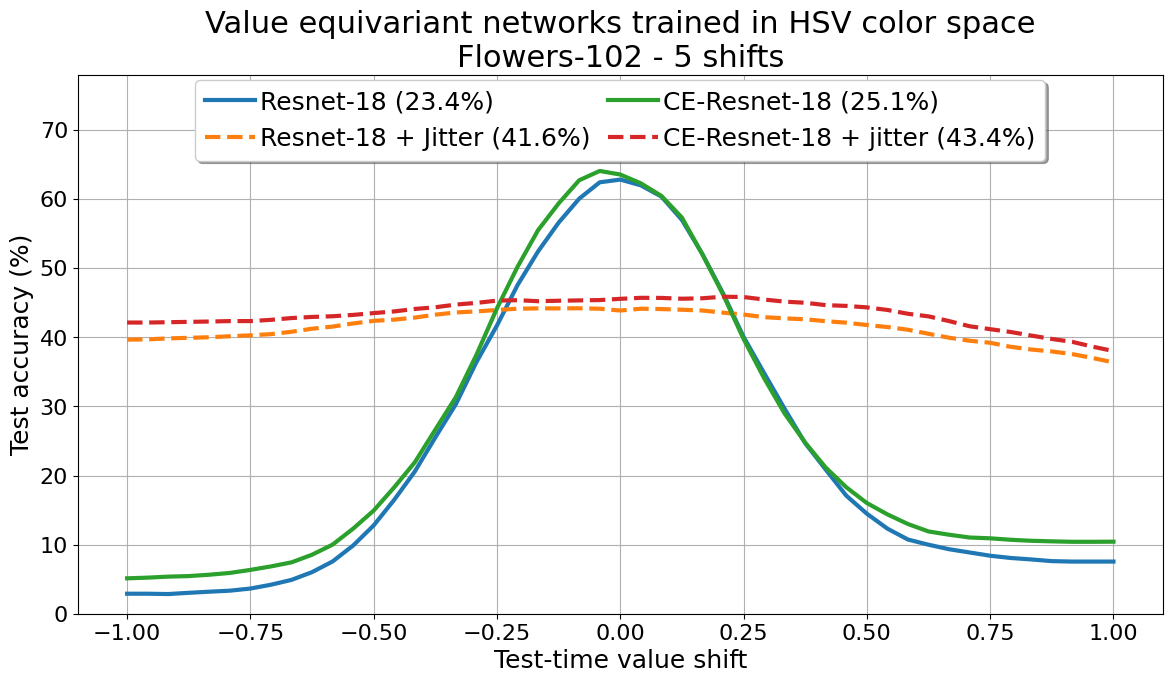

In [6]:
from utils import value_image
value_image()

In [15]:
from plot_saturation import plot_3d, plot_sat_base, plot_sat_shift, plot_sat_jitters

paths_sat_shifts = [
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_10-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz"
]

paths_jit = [
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_2-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_20-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_100-no_norm.npz",
]

paths_3d = [
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-img_shift-no_norm_test-rot=25_test-sat=25.npz",
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-no_norm_test-rot=25_test-sat=25.npz",
    "output/test_results/maintest_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-img_shift-no_norm_test-rot=25_test-sat=25.npz",
    "output/test_results/maintest_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-no_norm_test-rot=25_test-sat=25.npz"
]

paths_sat_base = [
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-img_shift-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_20-img_shift-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-img_shift-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_20-img_shift-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_20-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_1_1-no_norm.npz",
    "output/test_results/maintest_flowers102-resnet18_5-true-jitter_0_0-split_1_0-seed_0-hsv_space-sat_shift-sat_jitter_0_20-no_norm.npz"
]

# plot_3d(paths_3d[0], saturations=25, rotations=25, num_shift="No", shift="Image", filename="HueSat_HSV_shiftImgBase_noNorm.jpg")
# plot_3d(paths_3d[1], saturations=25, rotations=25, num_shift="No", filename="HueSat_HSV_shiftKernelBase_noNorm.jpg")
# plot_3d(paths_3d[2], saturations=25, rotations=25, shift="Image", filename="HueSat_HSV_shiftImage_noNorm.jpg")
# plot_3d(paths_3d[3], saturations=25, rotations=25, filename="HueSat_HSV_shiftKernel_noNorm.jpg")
plot_sat_base(paths_sat_base[4:])
plot_sat_base(paths_sat_base, shift="Image")
plot_sat_shift(paths_sat_shifts)
plot_sat_jitters(paths_jit)

FileNotFoundError: [Errno 2] No such file or directory: 'CEConv/output/test_results/sat/maintest_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-img_shift-no_norm_test-rot=25_test-sat=25.npz'

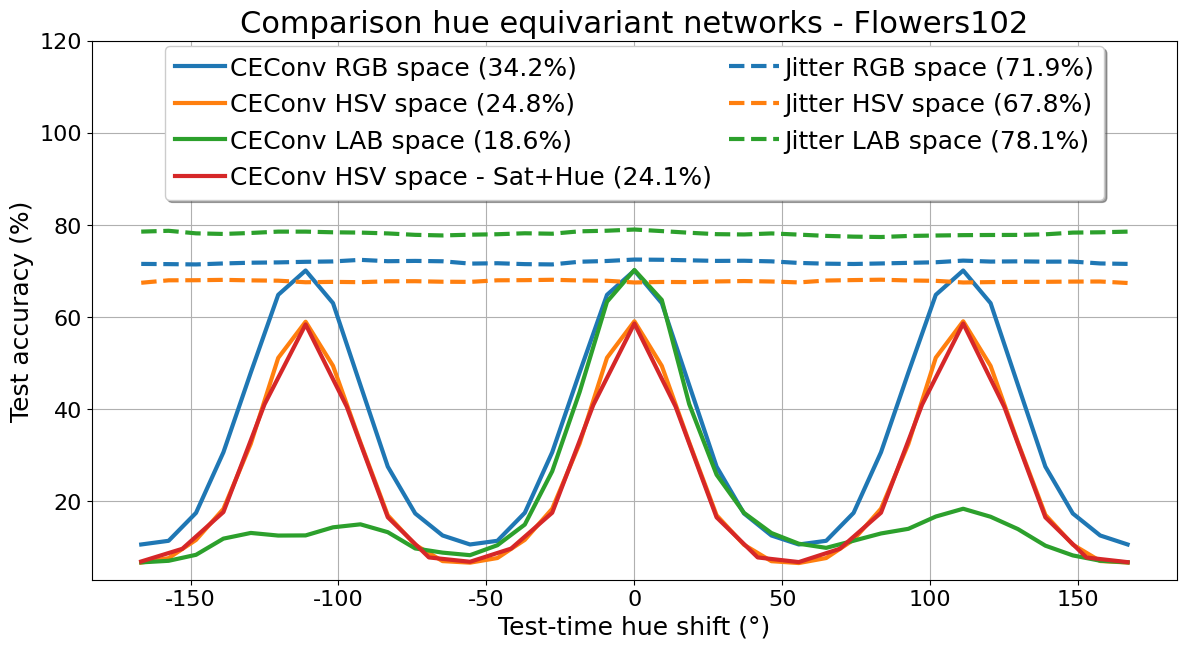

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def color_spaces(path):
    x = np.load(f"{path}/output/classification/npz/hue_shift_img/hue_baseline_flowers102-resnet18_1-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_shift-sat_jitter_1_1-val_jitter_1_1-img_shift-no_norm.npz")["hue"]
    CEConv_base_jitter = np.load(f"{path}/output/classification/npz/flowers102-resnet18_3-true-jitter_0_5-split_1_0-seed_0.npz")["acc"]
    CEConv_hsv_jitter = np.load(f"output/test_results/hue_shift_img/hue_flowers102-resnet18_3-true-jitter_0_5-split_1_0-seed_0-hsv_space-hue_shift-sat_jitter_1_1-val_jitter_1_1-img_shift-no_norm.npz")["acc"]
    CEConv_LAB_jitter = np.load(f"./output/test_results/lab_shift/flowers102-resnet18_3-true-jitter_0_5-split_1_0-seed_0-lab_space-sat_jitter_1_1-val_jitter_1_1-no_norm.npz")["acc"]
    # sat_hue_acc = np.load("output/test_results/maintest_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-img_shift-no_norm_test-rot=25_test-sat=25.npz")["acc"].reshape((25,25)).max(axis=1)
    
    CEConv_base = np.load(f"{path}/output/classification/npz/flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0.npz")["acc"]
    CEConv_hsv = np.load(f"output/test_results/hue_shift_img/hue_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_shift-sat_jitter_1_1-val_jitter_1_1-img_shift-no_norm.npz")["acc"]
    CEConv_LAB = np.load(f"./output/test_results/lab_shift//flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-lab_space-sat_jitter_1_1-val_jitter_1_1-no_norm.npz")["acc"]
    sat_hue_acc = np.load("output/test_results/maintest_flowers102-resnet18_3-true-jitter_0_0-split_1_0-seed_0-hsv_space-hue_and_sat_shift-sat_jitter_1_1-img_shift-no_norm_test-rot=25_test-sat=25.npz")["acc"].reshape((25,25)).max(axis=1)
    fig, ax = plt.subplots(figsize=(14, 7))

    plt.plot(x, CEConv_base*100, label=f"CEConv RGB space ({CEConv_base.mean()*100:.1f}%)", linewidth=3)
    plt.plot(x, CEConv_hsv*100,  label=f"CEConv HSV space ({CEConv_hsv.mean()*100:.1f}%)",linewidth=3)
    plt.plot(x, CEConv_LAB*100,  label=f"CEConv LAB space ({CEConv_LAB.mean()*100:.1f}%)",linewidth=3)
    plt.plot(np.linspace(-0.5, 0.5, 25), sat_hue_acc*100, label=f"CEConv HSV space - Sat+Hue ({np.mean(sat_hue_acc)*100:.1f}%)", linewidth=3)

    
    plt.plot(x, CEConv_base_jitter*100, label=f"Jitter RGB space ({CEConv_base_jitter.mean()*100:.1f}%)", linewidth=3, color="tab:blue", ls="--")
    plt.plot(x, CEConv_hsv_jitter*100,  label=f"Jitter HSV space ({CEConv_hsv_jitter.mean()*100:.1f}%)",linewidth=3, color="tab:orange", ls="--")
    plt.plot(x, CEConv_LAB_jitter*100,  label=f"Jitter LAB space ({CEConv_LAB_jitter.mean()*100:.1f}%)",linewidth=3, color="tab:green", ls="--")

    plt.title("Comparison hue equivariant networks - Flowers102", fontsize=22)
    plt.ylabel("Test accuracy (%)", fontsize=18)
    plt.yticks(fontsize=16,)
    plt.ylim(top=120)
    plt.xlabel("Test-time hue shift (°)", fontsize=18)
    plt.xticks(fontsize=16,ticks=[-0.45, -0.3, -0.15, 0, 0.15, 0.3, 0.45],labels=["-150", "-100", "-50", "0", "50", "100", "150" ])
    plt.legend(fontsize=18, loc='upper center', bbox_to_anchor=(0.5, 0.99),
            borderaxespad=0., ncol=2, fancybox=True, shadow=True,
            columnspacing=0.7, handletextpad=0.2)
    plt.grid(axis="both")
    # plt.savefig("../blogpost_imgs/comparison.png")
    plt.show()

color_spaces("/home/arco/Downloads/Master AI/CEConvDL2")

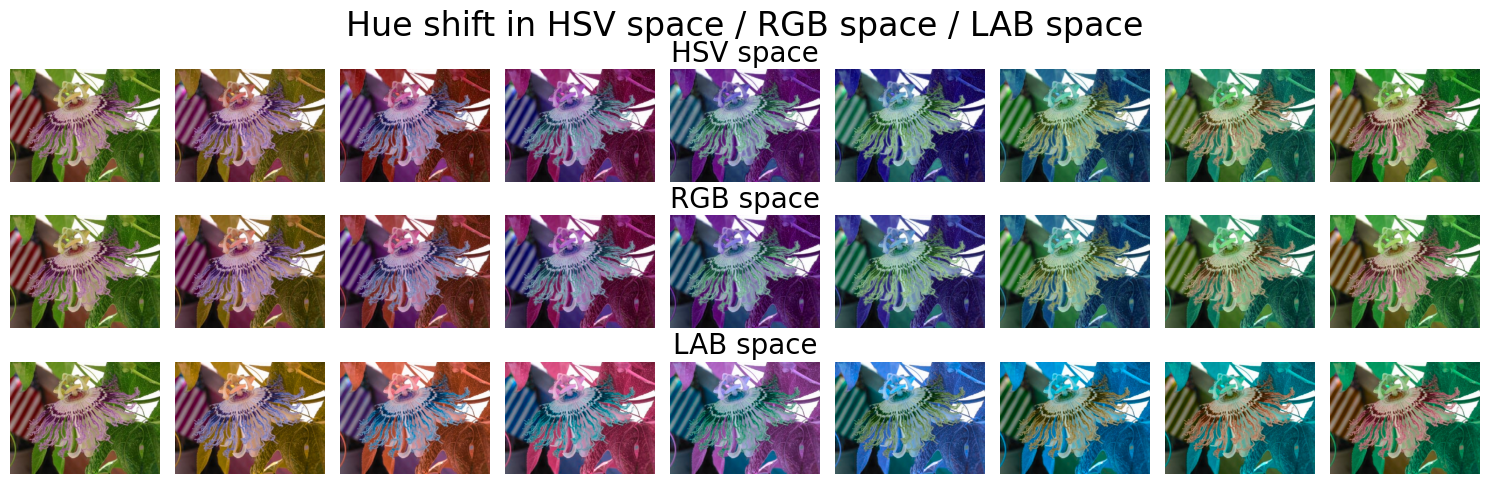

In [13]:
from utils import colorspace_comparison
colorspace_comparison()